<a href="https://colab.research.google.com/github/cansibi/Deep-learning/blob/master/RNN_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [ ]:
df = pd.read_csv('/content/Google_Stock_Price_Train.csv', index_col=0)
df.index = list(map(lambda x:datetime.datetime.strptime(x, '%m/%d/%Y'), df.index))
for i in range(len(df['Volume'])):
  df['Volume'][i]=df['Volume'][i].replace(',','')
df['Volume']=pd.to_numeric(df['Volume'])
for i in range(len(df['Close'])):
  df['Close'][i]=df['Close'][i].replace(',','')
df['Close']=pd.to_numeric(df['Close'])
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Open,High,Low,Close,Volume
2012-01-03,325.25,332.83,324.97,663.59,7380500
2012-01-04,331.27,333.87,329.08,666.45,5749400
2012-01-05,329.83,330.75,326.89,657.21,6590300
2012-01-06,328.34,328.77,323.68,648.24,5405900
2012-01-09,322.04,322.29,309.46,620.76,11688800


In [ ]:
testset= pd.read_csv('/content/Google_Stock_Price_Test.csv', index_col=0)
testset.index = list(map(lambda x:datetime.datetime.strptime(x, '%m/%d/%Y'), testset.index))
for i in range(len(testset['Volume'])):
  testset['Volume'][i]=testset['Volume'][i].replace(',','')
testset['Volume']=pd.to_numeric(testset['Volume'])
testset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Open,High,Low,Close,Volume
2017-01-03,778.81,789.63,775.80,786.14,1657300
2017-01-04,788.36,791.34,783.16,786.90,1073000
2017-01-05,786.08,794.48,785.02,794.02,1335200
2017-01-06,795.26,807.90,792.20,806.15,1640200
2017-01-09,806.40,809.97,802.83,806.65,1272400


In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size=5,   
            hidden_size=128,
            num_layers=1, 
            batch_first=True)
        
        self.out = nn.Sequential(
            nn.Linear(128, 5))
        
    def forward(self, x):
        r_out, (h_n, h_c) = self.lstm(x, None)   
        out = self.out(r_out)          
        
        return out

In [ ]:
LR = 0.0001
EPOCH = 2000


In [ ]:

def normalize(df):
  df1=df.copy()
  for i in df1.columns:
    df1[i]=(df1[i]-(np.mean(np.array(df1[i]))))/np.std(np.array(df1[i]))
  return df1

In [ ]:
df1=normalize(df)
df1

,Open,High,Low,Close,Volume
2012-01-03,-1.372855,-1.340653,-1.355794,-0.298018,1.857776
2012-01-04,-1.333209,-1.333854,-1.328483,-0.280651,1.140122
2012-01-05,-1.342692,-1.354253,-1.343036,-0.336758,1.510102
2012-01-06,-1.352505,-1.367198,-1.364366,-0.391225,0.988988
2012-01-09,-1.393995,-1.409566,-1.458855,-0.558087,3.753349
...,...,...,...,...,...
2016-12-23,1.693778,1.666317,1.716177,0.469013,-1.115225
2016-12-27,1.692329,1.699792,1.718702,0.478971,-1.042320
2016-12-28,1.712218,1.676059,1.689066,0.439502,-0.881858
2016-12-29,1.643925,1.621792,1.660626,0.425779,-1.062031


In [ ]:
new_testset=normalize(testset)

In [ ]:
new_testset

,Open,High,Low,Close,Volume
2017-01-03,-1.947845,-1.590669,-2.020454,-1.690368,-0.003930
2017-01-04,-1.300056,-1.468675,-1.451780,-1.631341,-0.888803
2017-01-05,-1.454711,-1.244662,-1.308066,-1.078357,-0.491723
2017-01-06,-0.832019,-0.287257,-0.753300,-0.136265,-0.029826
2017-01-09,-0.076378,-0.139580,0.068032,-0.097432,-0.586828
2017-01-10,0.022656,-0.199507,0.120573,-0.241892,-0.731607
2017-01-11,-0.171342,-0.269422,-0.044775,0.000427,-0.899555
2017-01-12,-0.026183,-0.323641,-0.214759,-0.119956,-0.464615
2017-01-13,-0.003120,-0.050403,0.366277,-0.001903,-0.849125
2017-01-17,-0.030253,-0.341477,-0.122041,-0.255872,-0.450985


In [ ]:
train_data_numpy=np.array(df1)
train_data_tensor=torch.Tensor(train_data_numpy)

In [ ]:
test_data_numpy = np.array(new_testset)
test_data_tensor = torch.Tensor(test_data_numpy)

In [ ]:
X_train=[]
Y_train=[]
timesteps = 7
for i in range(timesteps, 1258):
    X_train.append(train_data_numpy[i-timesteps:i])
    Y_train.append(train_data_numpy[i-timesteps:i])

In [ ]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [ ]:
X_val=torch.Tensor(X_train[900:])
Y_val=torch.Tensor(Y_train[900:])
X_train=torch.Tensor(X_train[:900])
Y_train=torch.Tensor(Y_train[:900])
X_train=X_train.cuda()
Y_train=Y_train.cuda()
X_val=X_val.cuda()
Y_val=Y_val.cuda()

In [ ]:
Y_train=Y_train.reshape(Y_train.shape[0],-1,Y_train.shape[1])
Y_val=Y_val.reshape(Y_val.shape[0],-1,Y_val.shape[1])

In [ ]:
class TrainSet(Dataset):
    def __init__(self, Xtrain,Ytrain):
        self.data, self.label = Xtrain.float(), Ytrain.float()

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)

In [ ]:

train_set = TrainSet(X_train,Y_train)
val_set=TrainSet(X_val,Y_val)
train_loader = DataLoader(train_set, batch_size=256, shuffle=True)
val_loader = DataLoader(val_set, batch_size=256, shuffle=True)


In [ ]:
Loss=[]
Step=[]
import os
rnn=LSTM()
if torch.cuda.is_available():
  rnn = rnn.cuda()

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)  # optimize all cnn parameters
loss_func = nn.MSELoss()

best_loss = 1000


if not os.path.exists('weights'):
  os.mkdir('weights')    

for step in range(EPOCH):
     for tx, ty in train_loader:
         if torch.cuda.is_available():
             tx = tx.cuda()
             ty = ty.cuda() 
        
         output = rnn(tx)          
         loss = loss_func(torch.squeeze(output), ty)
         Loss.append(loss.cpu().item())        
         optimizer.zero_grad() 
         loss.backward()  
         optimizer.step()
         Step.append(step)
        
         print('epoch : %d  ' % step, 'train_loss : %.4f' % loss.cpu().item())

        
     with torch.no_grad():
           for tx, ty in val_loader:
             if torch.cuda.is_available():
               tx = tx.cuda()
               ty = ty.cuda()
             output = rnn((tx))
             loss = loss_func(torch.squeeze(output), ty)
             print('epoch : %d  ' % step, 'val_loss : %.4f' % loss.cpu().item())
             
           if loss.cpu().item() < best_loss:
            best_loss = loss.cpu().item()
            torch.save(rnn, 'weights/rnn.pth'.format(loss.cpu().item()))
            print('new model saved at epoch {} with val_loss {}'.format(step, best_loss))

流式输出内容被截断，只能显示最后 5000 行内容。
epoch : 1174   train_loss : 0.0010
epoch : 1174   train_loss : 0.0007
epoch : 1174   val_loss : 0.0311
epoch : 1174   val_loss : 0.0308
epoch : 1175   train_loss : 0.0008
epoch : 1175   train_loss : 0.0008
epoch : 1175   train_loss : 0.0008
epoch : 1175   train_loss : 0.0010
epoch : 1175   val_loss : 0.0309
epoch : 1175   val_loss : 0.0311
epoch : 1176   train_loss : 0.0008
epoch : 1176   train_loss : 0.0007
epoch : 1176   train_loss : 0.0010
epoch : 1176   train_loss : 0.0007
epoch : 1176   val_loss : 0.0297
epoch : 1176   val_loss : 0.0343
epoch : 1177   train_loss : 0.0009
epoch : 1177   train_loss : 0.0007
epoch : 1177   train_loss : 0.0007
epoch : 1177   train_loss : 0.0010
epoch : 1177   val_loss : 0.0305
epoch : 1177   val_loss : 0.0321
epoch : 1178   train_loss : 0.0009
epoch : 1178   train_loss : 0.0008
epoch : 1178   train_loss : 0.0009
epoch : 1178   train_loss : 0.0006
epoch : 1178   val_loss : 0.0307
epoch : 1178   val_loss : 0.0312
epoch : 1179 

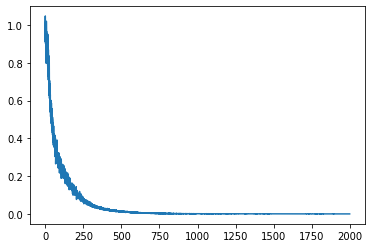

In [ ]:
Loss=np.array(Loss)
plt.plot(Step,Loss)

In [ ]:
rnn = LSTM()

rnn = torch.load('weights/rnn.pth')

(900,)


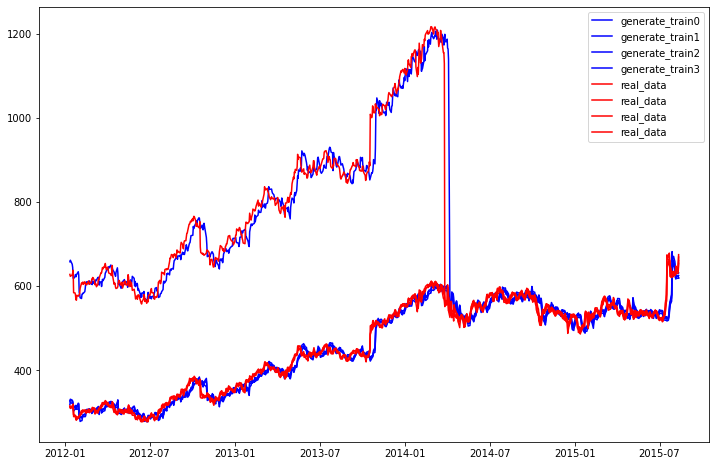

In [ ]:
generate_data_train0 = []
generate_data_train1 = []
generate_data_train2 = []
generate_data_train3 = []
generate_data_train4 = []
generate_data_test = []


for i in range(len(X_train)):
    x = X_train[i]
    x = torch.unsqueeze(x, dim=0)
    if torch.cuda.is_available():
        x = x.cuda()

    y = torch.squeeze(rnn(x))
    generate_data_train0.append(torch.squeeze(y.cpu()).detach().numpy()[0][0] * np.std(np.array(df['Open'])) + (np.mean(np.array(df['Open']))))
    generate_data_train1.append(torch.squeeze(y.cpu()).detach().numpy()[0][1] * np.std(np.array(df['High'])) + (np.mean(np.array(df['High']))))
    generate_data_train2.append(torch.squeeze(y.cpu()).detach().numpy()[0][2] * np.std(np.array(df['Low'])) + (np.mean(np.array(df['Low']))))
    generate_data_train3.append(torch.squeeze(y.cpu()).detach().numpy()[0][3] * np.std(np.array(df['Close'])) + (np.mean(np.array(df['Close']))))
    generate_data_train4.append(torch.squeeze(y.cpu()).detach().numpy()[0][0] * np.std(np.array(df['Volume'])) + (np.mean(np.array(df['Volume']))))       
generate_data_train = np.array(generate_data_train)
print(generate_data_train.shape)
plt.figure(figsize=(12,8))
plt.plot(df.index[7:907], generate_data_train0, 'b', label='generate_train0')
plt.plot(df.index[7:907], generate_data_train1, 'b', label='generate_train1')
plt.plot(df.index[7:907], generate_data_train2, 'b', label='generate_train2')
plt.plot(df.index[7:907], generate_data_train3, 'b', label='generate_train3')
plt.plot(df.index[7:907], df[7:907].drop(['Volume'],axis=1), 'r', label='real_data')
plt.legend()
plt.show()

In [ ]:
new_testset.shape

In [ ]:
X_test=[]
Y_test=[]
timesteps = 7
for i in range(timesteps, 20):
    X_test.append(train_data_numpy[i-timesteps:i])
    Y_test.append(train_data_numpy[i])

In [ ]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)
Y_test=Y_test.reshape(Y_test.shape[0],-1,Y_test.shape[1])
X_test=torch.Tensor(X_test)
Y_test=torch.Tensor(Y_test)
X_test=X_test.cuda()
Y_test=Y_test.cuda()

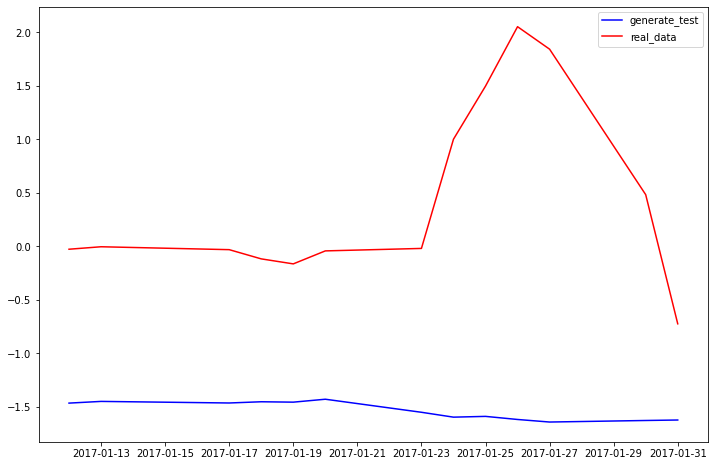

In [ ]:
generate_data_test=[]
for i in range(len(X_test)):
    x = X_test[i]
    x = torch.unsqueeze(x, dim=0)
    if torch.cuda.is_available():
        x = x.cuda()

    y = torch.squeeze(rnn(x))
    generate_data_test.append(torch.squeeze(y.cpu()).detach().numpy()[6][0] )
plt.figure(figsize=(12,8))
plt.plot(testset.index[7:], generate_data_test, 'b', label='generate_test')
plt.plot(testset.index[7:], np.array(new_testset['Open'][7:].copy().tolist()), 'r', label='real_data')
plt.legend()
plt.show()

In [ ]:
testset

,Open,High,Low,Close,Volume
2017-01-03,778.81,789.63,775.80,786.14,1657300
2017-01-04,788.36,791.34,783.16,786.90,1073000
2017-01-05,786.08,794.48,785.02,794.02,1335200
2017-01-06,795.26,807.90,792.20,806.15,1640200
2017-01-09,806.40,809.97,802.83,806.65,1272400
2017-01-10,807.86,809.13,803.51,804.79,1176800
2017-01-11,805.00,808.15,801.37,807.91,1065900
2017-01-12,807.14,807.39,799.17,806.36,1353100
2017-01-13,807.48,811.22,806.69,807.88,1099200
2017-01-17,807.08,807.14,800.37,804.61,1362100


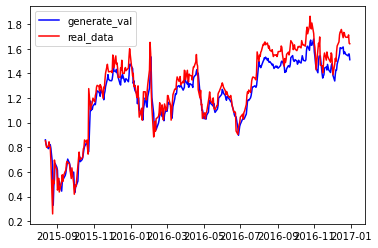

In [ ]:
generate_data_val=[]
for i in range(len(X_val)):
    x = X_val[i]
    x = torch.unsqueeze(x, dim=0)
    if torch.cuda.is_available():
        x = x.cuda()

    y = torch.squeeze(rnn(x))
    generate_data_val.append(torch.squeeze(y.cpu()).detach().numpy()[6][0])
plt.plot(df.index[907:], generate_data_val, 'b', label='generate_val')
plt.plot(df.index[907:], np.array(df1['Open'][907:].copy().tolist()), 'r', label='real_data')
plt.legend()
plt.show()